In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

fuel_econ=pd.read_csv('./fuel-econ.csv')
sedan_classes=['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass']=fuel_econ['VClass'].astype(vclasses)

fuel_econ['trans_type']=fuel_econ['trans'].apply(lambda x:x.split()[0])
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


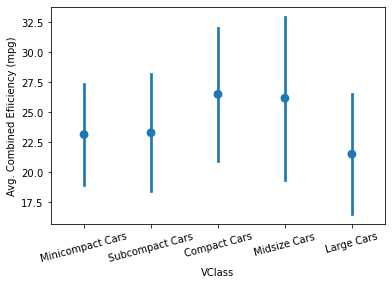

In [5]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', ci='sd', linestyles="")
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Efiiciency (mpg)');

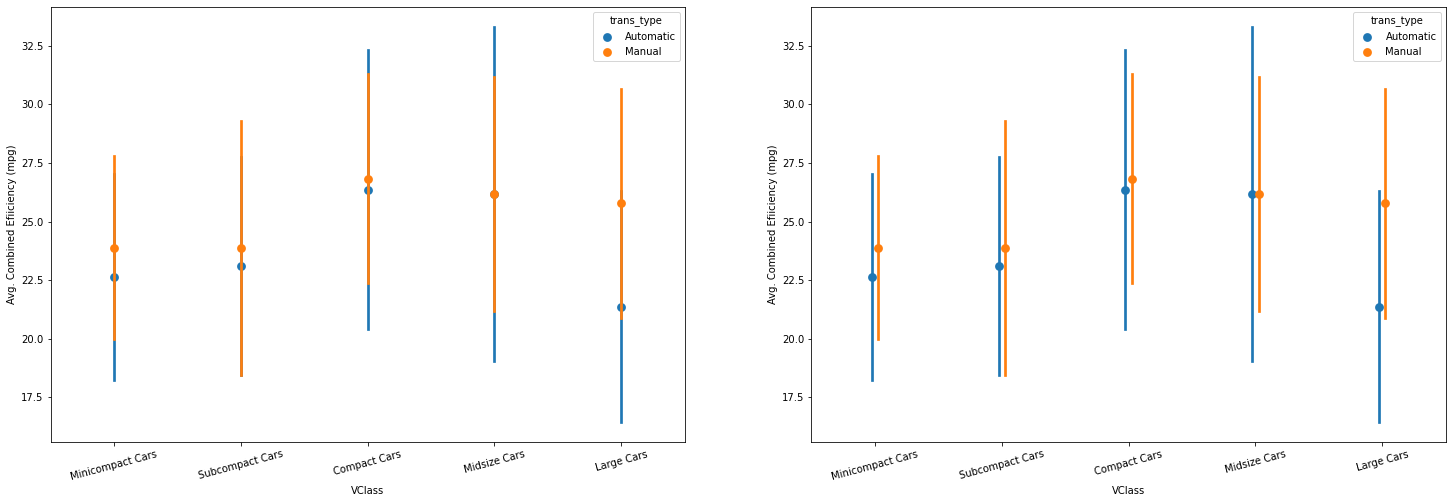

In [12]:
plt.figure(figsize=[25,8])

plt.subplot(1,2,1)
sb.pointplot(data=fuel_econ, x='VClass', y='comb', ci='sd', hue='trans_type',linestyles="")
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Efiiciency (mpg)');

plt.subplot(1,2,2)
sb.pointplot(data=fuel_econ, x='VClass', y='comb', ci='sd', hue='trans_type', linestyles="",
            dodge=True)
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Efiiciency (mpg)');

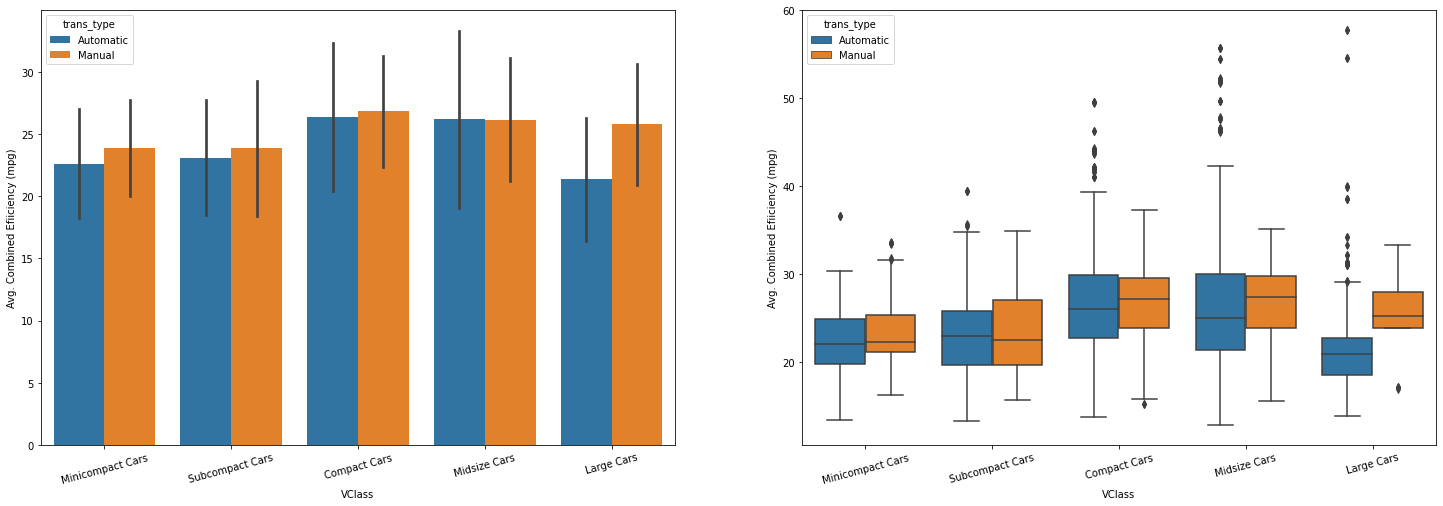

In [16]:
plt.figure(figsize=[25,8])

plt.subplot(1,2,1)
sb.barplot(data=fuel_econ, x='VClass', y='comb', ci='sd', hue='trans_type')
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Efiiciency (mpg)');

plt.subplot(1,2,2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb', hue='trans_type')
plt.xticks(rotation=15)
plt.ylabel('Avg. Combined Efiiciency (mpg)');

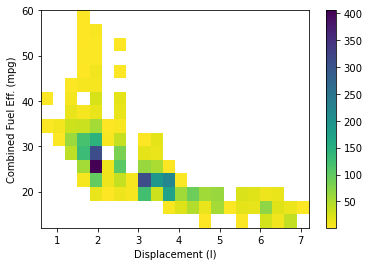

In [19]:
bins_x=np.arange(0.6, 7+0.3, 0.3)
bins_y=np.arange(12,58+3,3)

plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5,
          cmap='viridis_r', bins=[bins_x, bins_y])
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar();

In [27]:
displ_bins=pd.cut(fuel_econ['displ'], bins_x, right=False, include_lowest=False,labels=False).astype(int)
comb_bins=pd.cut(fuel_econ['comb'], bins_y, right=False, include_lowest=False,labels=False).astype(int)

n_ponts=fuel_econ.groupby([displ_bins, comb_bins]).size()
n_points=n_ponts.reset_index().pivot(index='displ', columns='comb').values

co2_weigths=fuel_econ['co2']/n_points[displ_bins,comb_bins]

co2_weigths

0        2.722543
1        0.861728
2        2.479769
3        2.578035
4        3.780488
          ...    
3924    15.600000
3925     8.346154
3926    35.333333
3927     2.036842
3928     2.194737
Name: co2, Length: 3929, dtype: float64

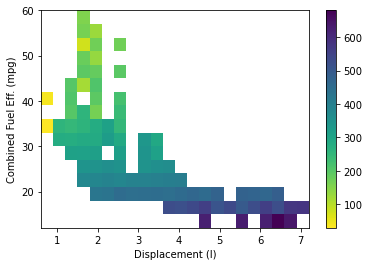

In [30]:
bins_x=np.arange(0.6, 7+0.3, 0.3)
bins_y=np.arange(12,58+3,3)

plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5,
          cmap='viridis_r', bins=[bins_x, bins_y], weights=co2_weigths)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar();